In [26]:
import numpy as np
import importlib
import scripts.theodolite_utils as theodo_u
import scripts.resection_functions as theodo_r
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [101]:
# This cell gathers result for the inter-prism distance resection
theodo_r = importlib.reload(theodo_r)
theodo_u = importlib.reload(theodo_u)

path = "../data/20221129-5/"
name_param_file = "f-2-2-2-4-4-0-L_"

i = path+"filtered_prediction/"+name_param_file
j = path+"total_stations/GCP.txt"

file_sensors = theodo_u.if_file_exist(path + "sensors_extrinsic_calibration/calibration_results.csv",'')
extrinsic_calibration_results = theodo_u.read_extrinsic_calibration_results_file(file_sensors)
k = extrinsic_calibration_results

trimble_1 = theodo_u.read_prediction_data_resection_csv_file(i + "1.csv")
trimble_2 = theodo_u.read_prediction_data_resection_csv_file(i + "2.csv")
trimble_3 = theodo_u.read_prediction_data_resection_csv_file(i + "3.csv")

In [102]:
Tf = theodo_u.read_saved_tf(path+"list_tf/TF_list_static_cp.csv")
Tf_1 = Tf[0]
Tf_12 = Tf[1]
Tf_13 = Tf[2]

P1 = (Tf_1@trimble_1[:,1:5].T).T
P2 = (Tf_12@trimble_2[:,1:5].T).T
P3 = (Tf_13@trimble_3[:,1:5].T).T

In [103]:
dist_list = theodo_r.inter_prism_distance_error(P1, P2, P3, k)

dist_12 = []
dist_13 = []
dist_23 = []
number = 0
for i in dist_list:
    if(number%3==0):
        dist_12.append(i)
    if(number%3==1):
        dist_13.append(i)
    if(number%3==2):
        dist_23.append(i)
    number=number+1

print(np.median(dist_12),np.median(dist_13),np.median(dist_23))

2.7147809328048056 5.9806453680575355 5.118520729714637


In [91]:
dist_12_sorted = []
dist_13_sorted = []
dist_23_sorted = []
limit_dist = 10
for i,j in zip(trimble_1[:,0], dist_12):
    if(j<limit_dist):
        dist_12_sorted.append([i,j])
for i,j in zip(trimble_2[:,0], dist_13):
    if(j<limit_dist):
        dist_13_sorted.append([i,j])
for i,j in zip(trimble_3[:,0], dist_23):
    if(j<limit_dist):
        dist_23_sorted.append([i,j])

dist_12_sorted = np.array(dist_12_sorted)
dist_13_sorted = np.array(dist_13_sorted)
dist_23_sorted = np.array(dist_23_sorted)

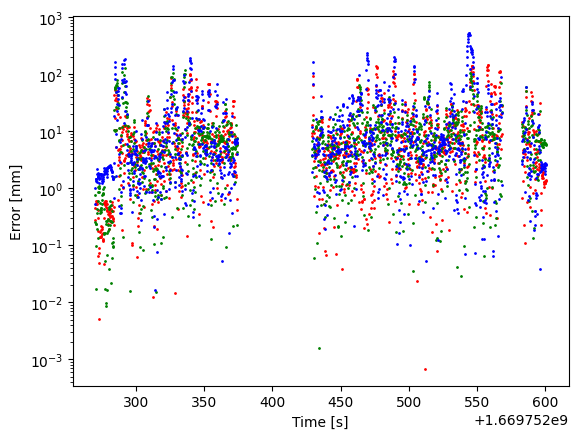

In [85]:
plt.figure()

plt.scatter(trimble_1[:,0], dist_12, s =1, color="r")
plt.scatter(trimble_2[:,0], dist_13, s =1, color="g")
plt.scatter(trimble_3[:,0], dist_23, s =1, color="b")
plt.xlabel("Time [s]")
plt.ylabel("Error [mm]")
plt.yscale('log')

plt.show()

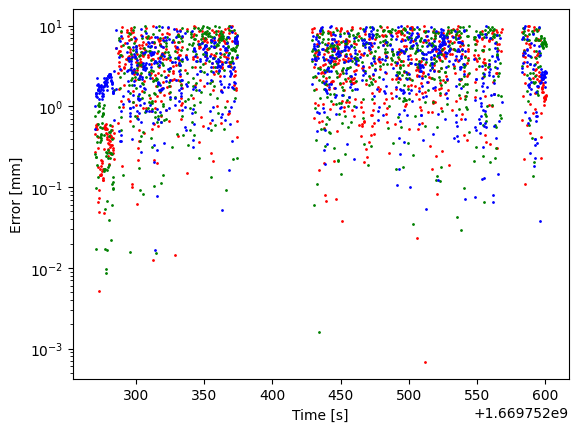

In [86]:
plt.figure()

plt.scatter(dist_12_sorted[:,0], dist_12_sorted[:,1], s =1, color="r")
plt.scatter(dist_13_sorted[:,0], dist_13_sorted[:,1], s =1, color="g")
plt.scatter(dist_23_sorted[:,0], dist_23_sorted[:,1], s =1, color="b")
plt.xlabel("Time [s]")
plt.ylabel("Error [mm]")
plt.yscale('log')

plt.show()